# Spam Detector

## imports

In [12]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## data read in and optimization

In [14]:
dat_sms = pd.read_csv("spam_dataset.csv",encoding='ISO-8859-1')

In [15]:
dat_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
dat_sms = dat_sms.drop('Unnamed: 2', axis=1)
dat_sms = dat_sms.drop('Unnamed: 3', axis=1)
dat_sms = dat_sms.drop('Unnamed: 4', axis=1)

In [17]:
dat_sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
dat_sms = dat_sms.rename(columns={'v1':'label', 'v2':'message'})

## data overview

In [19]:
dat_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
dat_sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
dat_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
dat_sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## feature engineering

In [25]:
dat_sms['length'] = dat_sms['message'].apply(len)
dat_sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(16,8)})

<AxesSubplot:xlabel='length', ylabel='Count'>

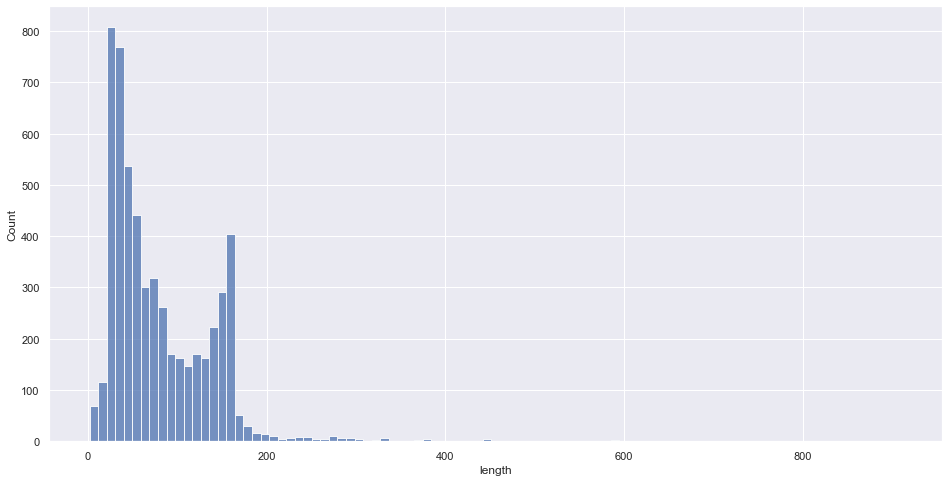

In [28]:
sns.histplot(data=dat_sms, x='length')

### finding and printing the longest message

In [30]:
dat_sms['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [35]:
dat_sms[dat_sms['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<AxesSubplot:xlabel='length', ylabel='Count'>

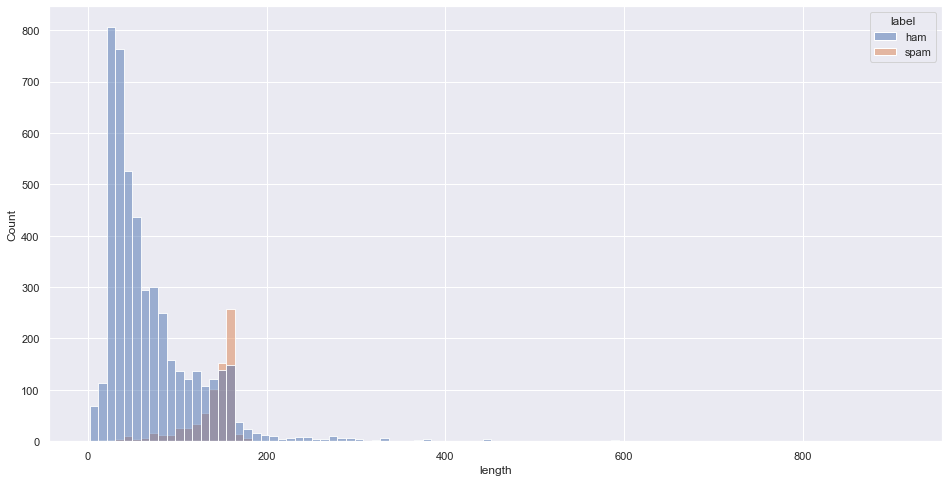

In [37]:
sns.histplot(data=dat_sms, x='length', hue='label')

In [43]:
spam = dat_sms[dat_sms['label'] == 'spam']
ham = dat_sms[dat_sms['label'] == 'ham']

spam.head()

,label,message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


Text(0.5, 1.0, 'Length of spam messages')

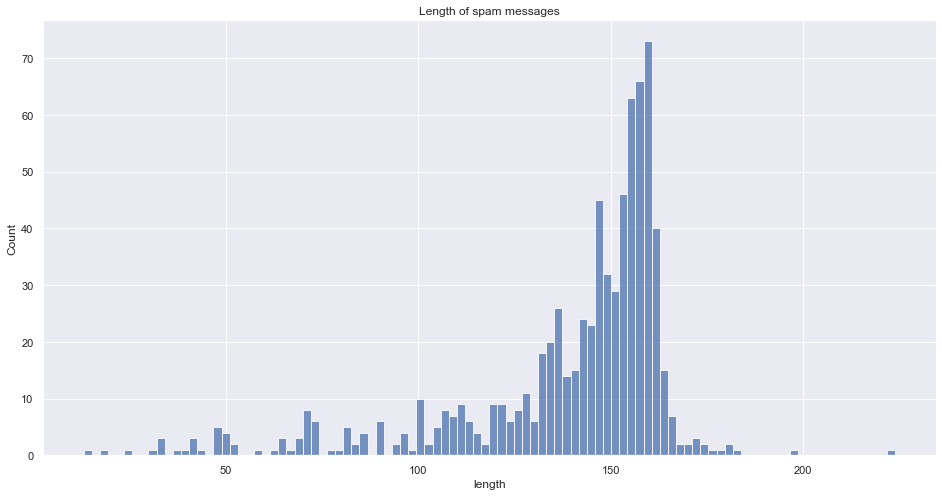

In [45]:
sns.histplot(data=spam, x='length', bins=100).set_title("Length of spam messages")

Text(0.5, 1.0, 'Length of ham messages')

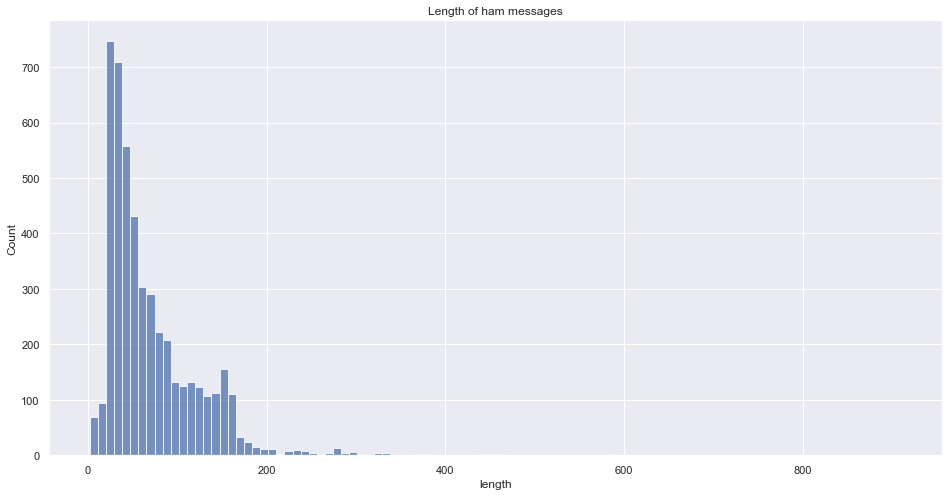

In [46]:
sns.histplot(data=ham, x='length', bins=100).set_title("Length of ham messages")

-> possible usable feature

### removing punctuation and stop words

In [47]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
# Simple example first
example_msg = 'Hello people out there, I would love to show what I am doing! Lets see if we are able to remove the punctuation.'

without_punc = [char for char in example_msg if not char in string.punctuation]

In [64]:
without_punc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 'o',
 'u',
 't',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'w',
 'o',
 'u',
 'l',
 'd',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 't',
 'o',
 ' ',
 's',
 'h',
 'o',
 'w',
 ' ',
 'w',
 'h',
 'a',
 't',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'd',
 'o',
 'i',
 'n',
 'g',
 ' ',
 'L',
 'e',
 't',
 's',
 ' ',
 's',
 'e',
 'e',
 ' ',
 'i',
 'f',
 ' ',
 'w',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'a',
 'b',
 'l',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [65]:
without_punc = ''.join(without_punc)

In [66]:
without_punc

'Hello people out there I would love to show what I am doing Lets see if we are able to remove the punctuation'

In [67]:
without_punc.split()

['Hello',
 'people',
 'out',
 'there',
 'I',
 'would',
 'love',
 'to',
 'show',
 'what',
 'I',
 'am',
 'doing',
 'Lets',
 'see',
 'if',
 'we',
 'are',
 'able',
 'to',
 'remove',
 'the',
 'punctuation']

In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\denni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
cleaned_msg = [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]

In [69]:
cleaned_msg

['Hello',
 'people',
 'would',
 'love',
 'show',
 'Lets',
 'see',
 'able',
 'remove',
 'punctuation']

In [70]:
def message_cleaning(msg):
	without_punc = [char for char in msg if not char in string.punctuation]
	without_punc = ''.join(without_punc)
	return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]
	

In [73]:
dat_sms['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [74]:
dat_sms['message'].head(5).apply(message_cleaning)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### count vectorizer

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

#### create vocabulary

In [82]:
bow_transformer = CountVectorizer(analyzer=message_cleaning).fit(dat_sms['message'])

In [83]:
print(len(bow_transformer.vocabulary_))

11304


In [92]:
example_msg = dat_sms['message'][3]
example_msg

'U dun say so early hor... U c already then say...'

In [93]:
example_msg_bow = bow_transformer.transform([example_msg])
print(example_msg_bow)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [94]:
print(example_msg_bow.shape)

(1, 11304)
